In [1]:
import CMGDB

from interval import interval, imath

import matplotlib
import math
import time

# Leslie map numerical

In [2]:
# Define Leslie map
def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * math.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

In [3]:
subdiv_min = 20
subdiv_max = 30
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

model = CMGDB.Model(subdiv_min, subdiv_max, lower_bounds, upper_bounds, F)

In [4]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 17.4 s, sys: 353 ms, total: 17.8 s
Wall time: 18.6 s


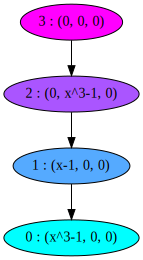

In [5]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

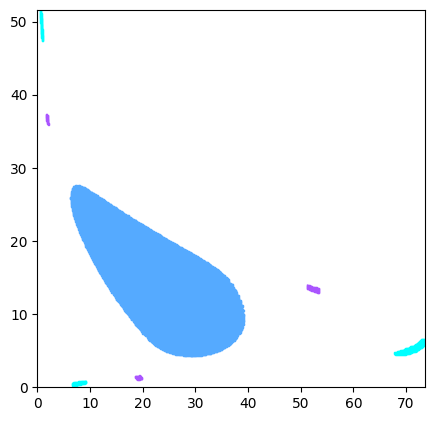

In [6]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

# Leslie map interval arithmetic

In [7]:
# Define interval box map for f
def IntervalBoxMap2D(f, rect):
    # Get endpoints defining rect
    x1, y1, x2, y2 = rect
    # Define interval box x
    x = [interval[x1, x2], interval[y1, y2]]
    # Evaluate f as an interval map
    y = f(x)
    # Get endpoints of y
    # y[0] is the first variable interval
    # y[1] is the second variable interval
    x1, x2 = y[0][0].inf, y[0][0].sup
    y1, y2 = y[1][0].inf, y[1][0].sup
    return [x1, y1, x2, y2]

In [8]:
# Define interval Leslie map
def f(x):
    th1 = interval[19.6]
    th2 = interval[23.68]
    return [(th1 * x[0] + th2 * x[1]) * imath.exp (-interval[0.1] * (x[0] + x[1])),
            interval[0.7] * x[0]]

# Define interval box map for f
def F(rect):
    return IntervalBoxMap2D(f, rect)

In [9]:
subdiv_min = 20
subdiv_max = 30
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [10]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 2min 7s, sys: 1.4 s, total: 2min 8s
Wall time: 2min 25s


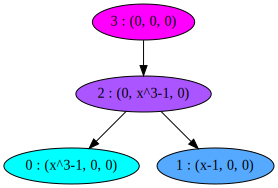

In [11]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

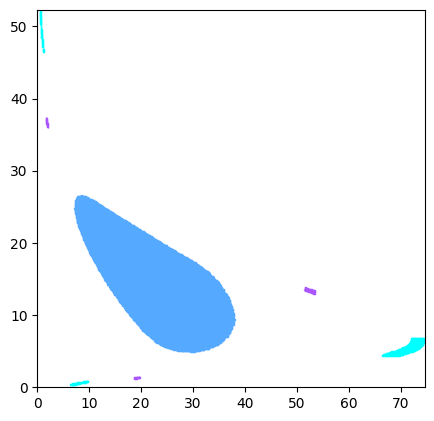

In [12]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

# Additional examples

In [13]:
# Define map f
def f(x):
    return [x[0] / (2.0 - x[0]), x[1] / (2.0 - x[1])]

# Define box map for f
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=False)

In [14]:
subdiv_min = 6
subdiv_max = 10
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0, 0]
upper_bounds = [1, 1]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [15]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 16.8 ms, sys: 4.4 ms, total: 21.2 ms
Wall time: 39.6 ms


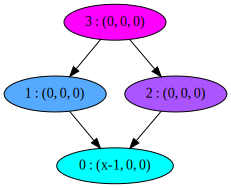

In [16]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

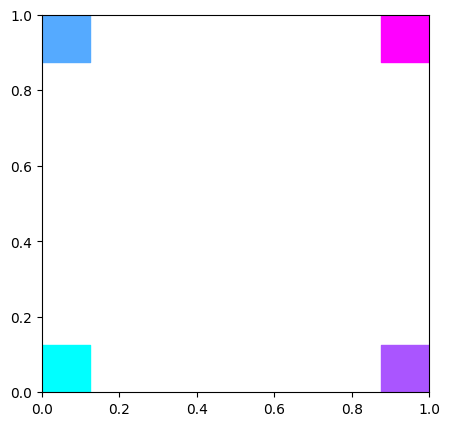

In [17]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

In [45]:
subdiv_min = 6
subdiv_max = 10
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0, 0]
upper_bounds = [1.2, 1.2]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [46]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 120 ms, sys: 6.95 ms, total: 127 ms
Wall time: 129 ms


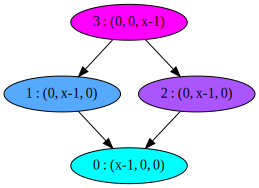

In [47]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

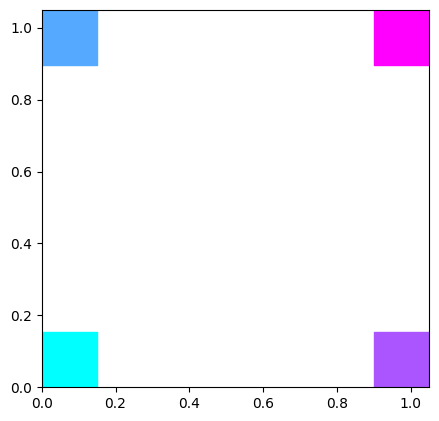

In [48]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)

## With interval arithmetic

In [49]:
# Define interval box map for f
def F(rect):
    return IntervalBoxMap2D(f, rect)

In [97]:
subdiv_min = 6
subdiv_max = 8
subdiv_init = 4
subdiv_limit = 10000
lower_bounds = [0, 0]
upper_bounds = [1, 1]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit,
                    lower_bounds, upper_bounds, F)

In [98]:
%%time
morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CPU times: user 54.8 ms, sys: 5.56 ms, total: 60.4 ms
Wall time: 71.1 ms


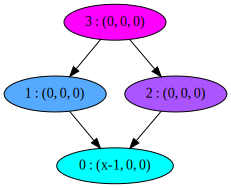

In [99]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

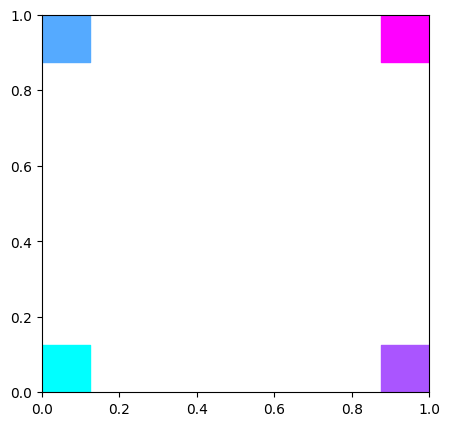

In [100]:
CMGDB.PlotMorseSets(morse_graph, cmap=matplotlib.cm.cool, fig_w=5, fig_h=5)